# **1. Import Library**

Langkah awal berupa pengimporan pustaka-pustaka Python penting (pandas, numpy, seaborn, matplotlib, dan modul-modul scikit-learn) yang akan dipakai untuk analisis data serta pembuatan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Dataset hasil clustering dari notebook dataPreprocessing/clustering dimuat dari file CSV yang telah diunggah ke GitHub, kemudian dibaca menggunakan pandas dan disimpan dalam sebuah DataFrame untuk analisis lanjutan.

In [9]:
# Datanya Saya Upload ke Github pribadi (Public).
# Jika ingin mengecek sumber kagglenya : https://www.kaggle.com/datasets/datascientistanna/customers-dataset/data
data=pd.read_csv("https://raw.githubusercontent.com/TokSeKa-uajy/datasetPython/refs/heads/main/MCPemula/customer_cluster_results_normalisasi.csv")

In [3]:
# Tampilkan 5 data teratas
print("5 Data Teratas:")
print(data.head(), '\n')

# Info umum data
print("Info DataFrame:")
print(data.info(), '\n')

# Cek missing values
print("Missing Values:")
print(data.isnull().sum(), '\n')

# Cek duplikat
print("Jumlah Data Duplikat:")
print(data.duplicated().sum(), '\n')

# Statistik deskriptif
print("Statistik Deskriptif:")
print(data.describe(), '\n')

# Cek outlier menggunakan metode IQR
def detect_outliers_iqr(df):
    outlier_summary = {}
    for col in df.select_dtypes(include=[np.number]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        outlier_summary[col] = outliers
    return pd.Series(outlier_summary, name="Jumlah Outlier")

print("Jumlah Outlier per Kolom:")
print(detect_outliers_iqr(data))

5 Data Teratas:
        Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0  0.191919           0.078958                    0.39         0.058824   
1  0.212121           0.184236                    0.81         0.176471   
2  0.202020           0.452694                    0.06         0.058824   
3  0.232323           0.310569                    0.77         0.000000   
4  0.313131           0.200027                    0.40         0.117647   

   Family Size  Gender_Female  Gender_Male  Profession_Artist  \
0        0.375          False         True              False   
1        0.250          False         True              False   
2        0.000           True        False              False   
3        0.125           True        False              False   
4        0.625           True        False              False   

   Profession_Doctor  Profession_Engineer  Profession_Entertainment  \
0              False                False                     False   


# **3. Data Splitting**

Proses ini dilakukan untuk membagi dataset menjadi dua bagian: data latih (training set) dan data uji (test set). Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk mengevaluasi kinerja model terhadap data yang belum pernah dilihat sebelumnya.
Hal ini penting agar model dapat diuji kemampuannya dalam melakukan generalisasi terhadap data baru.

In [4]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Cluster'])
y = data['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1572, 16), y_train=(1572,)
Test set shape: X_test=(393, 16), y_test=(393,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah menentukan algoritma klasifikasi yang tepat, model dilatih menggunakan data latih untuk mempelajari pola dari data.

Langkah-langkahnya meliputi:

Menentukan algoritma klasifikasi, seperti K-Nearest Neighbors, Decision Tree, Random Forest, SVM, atau Naive Bayes.

Melatih masing-masing model secara terpisah dengan data latih agar siap untuk diuji performanya.

In [5]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


####Untuk membangun model klasifikasi berdasarkan label hasil clustering, digunakan lima algoritma populer dalam supervised learning, yaitu:

1. K Nearest Neighbors (KNN)
KNN adalah algoritma klasifikasi berbasis instance based learning, yang melakukan prediksi berdasarkan mayoritas label dari k tetangga terdekat dalam ruang fitur. KNN sangat sederhana dan efektif untuk data yang terpisah jelas antar kelas.

2. Decision Tree (DT)
Decision Tree bekerja dengan membagi data ke dalam cabang cabang berdasar fitur yang paling informatif, membentuk struktur seperti pohon. Algoritma ini mudah dipahami dan bekerja baik untuk dataset yang memiliki relasi kompleks antar fitur.

3. Random Forest (RF)
Random Forest adalah ensemble dari banyak Decision Tree yang dilatih pada subset data yang berbeda. Setiap pohon memberikan vote, dan hasil akhir ditentukan berdasarkan mayoritas. RF meningkatkan akurasi dan mengurangi risiko overfitting.

4. Support Vector Machine (SVM)
SVM mencoba menemukan hyperplane terbaik yang memisahkan kelas kelas dalam ruang fitur. Cocok untuk data berdimensi tinggi dan memberikan performa kuat meskipun ukuran data tidak terlalu besar.

5. Naive Bayes (NB)
Naive Bayes adalah algoritma probabilistik berdasarkan Teorema Bayes dengan asumsi independensi antar fitur. Meski sederhana, NB cukup efektif dan cepat untuk dataset berukuran kecil hingga sedang, terutama ketika fitur fitur bersifat kategorikal.

#####Alasan utama Saya menggunakan semua model, karena semua yang Saya coba memberikan hasil sempurna (akurasi 100%).


## **b. Evaluasi Model Klasifikasi**

Untuk menilai performa model, dilakukan evaluasi terhadap hasil prediksi pada data uji dengan langkah berikut:

Melakukan prediksi menggunakan data uji.

Menghitung metrik evaluasi seperti Accuracy, Precision, Recall, dan F1-Score untuk melihat seberapa baik model bekerja.

Membuat confusion matrix untuk mengevaluasi jumlah prediksi yang benar dan salah secara lebih rinci.

Hasil evaluasi ini disusun dalam bentuk DataFrame agar memudahkan perbandingan antar model.

In [6]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results


# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision  Recall  F1-Score
0     K-Nearest Neighbors (KNN)       1.0        1.0     1.0       1.0
1            Decision Tree (DT)       1.0        1.0     1.0       1.0
2            Random Forest (RF)       1.0        1.0     1.0       1.0
3  Support Vector Machine (SVM)       1.0        1.0     1.0       1.0
4              Naive Bayes (NB)       1.0        1.0     1.0       1.0


Kode ini digunakan untuk menghasilkan classification report dari setiap model klasifikasi (KNN, Decision Tree, Random Forest, SVM, dan Naive Bayes) yang telah diuji.

Laporan ini menampilkan metrik evaluasi yang lebih rinci untuk masing-masing kelas, meliputi:

Precision: Ketepatan prediksi positif.

Recall: Kemampuan model menemukan semua data positif.

F1-Score: Rata-rata harmonis antara precision dan recall.

Support: Jumlah sampel sebenarnya di setiap kelas.

Tujuannya adalah untuk memberikan gambaran lengkap kinerja model terhadap tiap label/cluster.

In [7]:
from sklearn.metrics import classification_report

for model_name, model in [('KNN', knn), ('DT', dt), ('RF', rf), ('SVM', svm), ('NB', nb)]:
    y_pred = model.predict(X_test)
    print(f"\nClassification Report - {model_name}")
    print(classification_report(y_test, y_pred))



Classification Report - KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00       163
           2       1.00      1.00      1.00       114
           3       1.00      1.00      1.00        81

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393


Classification Report - DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00       163
           2       1.00      1.00      1.00       114
           3       1.00      1.00      1.00        81

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393


Classification Report - RF
              precision    recall  f1-score  

Kode ini digunakan untuk menganalisis kekuatan hubungan (korelasi) antara setiap fitur dengan label target (Cluster). Prosesnya dilakukan sebagai berikut:

Membuat salinan data latih (X_train) dan menambahkan kolom target (y_train) sebagai Cluster.

Menghitung matriks korelasi antar fitur numerik.

Menampilkan heatmap korelasi antara fitur dan label Cluster.

Visualisasi ini membantu dalam mengidentifikasi fitur mana yang paling berpengaruh terhadap klasifikasi, sehingga dapat digunakan untuk feature selection atau interpretasi model.

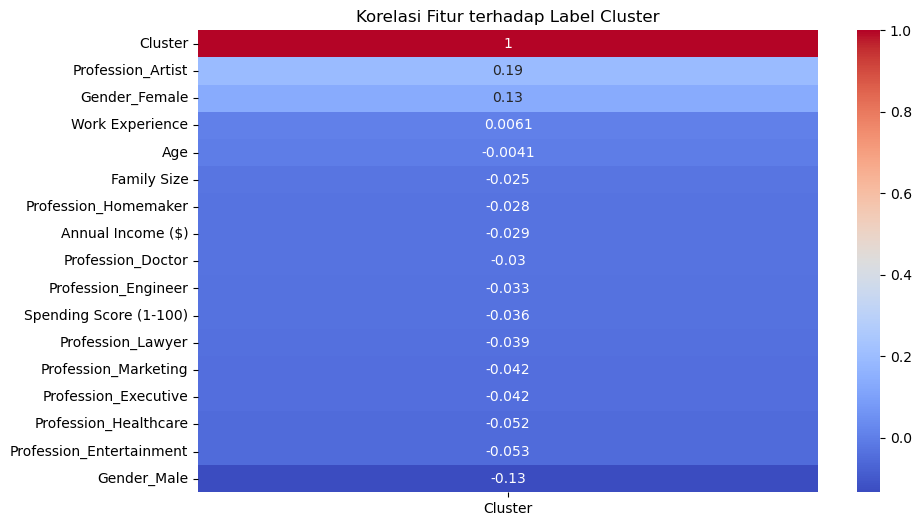

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df_temp = X_train.copy()
df_temp['Cluster'] = y_train
corr = df_temp.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr[['Cluster']].sort_values(by='Cluster', ascending=False), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur terhadap Label Cluster")
plt.show()


## **Analisis Hasil Evaluasi Model Klasifikasi**

###Hasil evaluasi dari lima algoritma klasifikasi menunjukkan performa yang sangat tinggi, dengan nilai Accuracy, Precision, Recall, dan F1-Score semuanya mencapai 1.00 (100%). Ini berarti model mampu mengklasifikasikan setiap data uji secara sempurna, tanpa kesalahan prediksi.
- Tidak dilakukan proses tuning model karena performa awal sudah maksimal.
- Tidak ditemukan indikasi overfitting maupun underfitting dari hasil evaluasi di data uji.
- Namun demikian, performa yang sempurna ini kemungkinan besar disebabkan oleh struktur dataset yang terlalu sederhana.

####Kelemahan & Catatan:
- Label yang digunakan berasal dari hasil clustering yang hanya memanfaatkan informasi dominan dari kolom Gender dan Profession.
- Fitur-fitur lain seperti penghasilan, usia, dan skor pengeluaran ternyata tidak banyak berkontribusi terhadap pemisahan klaster.
- Akibatnya, model klasifikasi pun cenderung hanya belajar membedakan berdasarkan label-label biner/kategorikal tersebut.

####Rekomendasi Lanjutan:
- Untuk kasus nyata, penting menggunakan dataset dengan variabilitas yang lebih tinggi dan label clustering yang mencerminkan segmentasi pelanggan yang lebih kompleks.